<a href="https://colab.research.google.com/github/SolbiChoi/TeamProject/blob/master/culture_good.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install konlpy wordcloud

In [ ]:
import pandas as pd
from konlpy.tag import Okt, Komoran, Kkma, Hannanum, Twitter, Mecab
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

In [ ]:
text = pd.read_excel('./culture_scraping.xlsx')
grade_4 = text['star grade'] >= 4.0

df_grade4 = text[grade_4]
df_grade4['star grade'].value_counts()

df_grade4.head(10)

,star grade,review
0,5.0,"저희 지역이 택배파업때문에 배송에 문제가 있었는데, 문의드린후 친절하게 응답해주시고..."
1,5.0,너무 좋아요 😃😃😃
2,5.0,너무 좋아요 고퀄ㅠㅠ
4,4.5,"사진 퀄리티는 좋은데 첫 장 부분 속지가 울어있더라구요,,,귀찮아서 교환은 안했는데..."
5,4.0,"사진들이 방송에 나온것과 많이 다르지 않음.\n제작, 배송도 늦음.\n내 가수 얼굴..."
6,5.0,불편한점이 없이 다 만족스러웠습니다. 감사합니다~^^
7,4.0,좋은 퀄리티로 늦어진다 안내는 받았는데 기다린 보람은 있게 퀄리티는 좋지만.. 검수...
8,5.0,배송도 빨리 오고 너무너무 이뻐요~~!♡♡
9,5.0,너무 잘 받았습니다. 배송일정이 늦어진건 아쉬웠지만 받아보니 퀄리티가 너무 좋네요~
10,5.0,모든게 다 와벽합니다!!\n진짜 너~~무 예뻐요\n감사합니다💓


In [ ]:
x_data = text['review']
y_data = text['star grade']

In [ ]:
def make_y_data(val):
    if (1 <= val < 2):
        return 1
    elif (2 <= val < 3):
        return 2
    elif (3 <= val < 4):
        return 3
    elif (4 <= val < 5):
        return 4
    elif (5 <= val < 6):
        return 5
    else:
        return None

In [ ]:
y_data = y_data.apply(lambda val:make_y_data(val))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((562,), (562,), (188,), (188,))

In [ ]:
!curl -O https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5064  100  5064    0     0  32670      0 --:--:-- --:--:-- --:--:-- 32670


In [ ]:
!bash ./mecab.sh

mecab-ko is already installed
mecab-ko-dic is already installed
mecab-python is already installed
Done.


In [ ]:
x_train.str.replace('[^가-힣ㄱ-ㅎㅠ ]','')

307    기타 자체는 만족 스럽지만 기타줄은좋은 소리를 못내주는것 같은 아쉬움이남네요 기타에...
414    드디어 기다리던 베어렐레가 오늘왔어요딸아이 생일 선물겸 대학입학선물로 펀딩했었는데 ...
463    조금은 기다림이 길었습니다동동거릴 정도는 아니었지만요진짜로 오랜 기다림 끝에기타를 ...
504                            음원이 적어서 아쉽지만 사용하기에는 편했습니다
107    칼림바는 소리도 좋고 제품도 좋다고 느껴집니다 받자마자 아이랑 함께 배우고 있는데요...
                             ...                        
28                                 구성 정말 최고화보는 소장가치 최고예요
206    기타 너무 예쁘고 만족스러워요 소리도 너무 좋네요ㅠ 합리적인 가격이어서 펀딩하길 잘...
540                             혼자 가지고놀기 좋아요기분전환용으로 최고네요
704    댕댕이 돌 기념으로 같이 사진 찍고 왔습니다 아이가 소심하고 많이 어색해 했는데도 ...
265    기타는 예쁘고 소장가치도 있습니다만먾은 분들이 공감하시듯 레스트가 아쉬워요개선된 제...
Name: review, Length: 562, dtype: object

In [ ]:
from konlpy.tag import Mecab
mecab = Mecab()

In [ ]:
stopwords = ['의', '은', '는', '이', '있', '하', '것', '들', '그', '되', '수', '이', '보', '않', '없', '나', '사람', '주', '아니', '등', '같', '우리'
, '때', '년', '가', '한', '지', '대하', '오', '말', '일', '그렇', '위하', '때문', '그것', '두', '말하', '알', '그러나'
, '받', '못하', '일', '그런', '또', '문제', '더', '사회', '많', '그리고', '좋', '크', '따르', '중', '나오', '가지', '씨'
, '시키', '만들', '지금', '생각하', '그러', '속', '하나', '집', '살', '모르', '적', '월', '데', '자신', '안', '어떤', '내'
, '경우', '명', '생각', '시간', '그녀', '다시', '이런', '앞', '보이', '번', '나', '다른', '어떻', '여자', '개', '전', '들'
, '사실', '이렇', '점', '싶', '말', '정도', '좀', '원', '잘', '통하', '소리', '놓', '걍', '과', '를', '으로', '자', '에', '와', '한', '하다']

In [ ]:
import pickle
pickle.dump(stopwords, open('./stopwords.pkl','wb'))

In [ ]:
sentence = list()

for tok in x_train:
  encoded = mecab.morphs(tok)
  sentence.append([item for item in encoded if item not in stopwords])

sentence

[['기타',
  '자체',
  '만족',
  '스럽',
  '지만',
  '기타',
  '줄',
  '못내',
  '아쉬움',
  '남',
  '네요',
  '.',
  '기타',
  '동봉',
  '된',
  '제품',
  '처음',
  '사진',
  '올리',
  '신',
  '보다',
  '퀄리티',
  '떨어지',
  '게',
  '아닌지요',
  '?',
  '늦',
  '게',
  '배송',
  '았',
  '는데',
  '갑자기',
  '일방',
  '공지',
  '로',
  '바꾼다고',
  '만',
  '.',
  '...',
  '당황',
  '했',
  '네요',
  '.',
  '기타',
  '쳐',
  '고',
  '적응',
  '해봐야',
  '겠',
  '어요',
  '.',
  '에서',
  '울려서',
  '그런지',
  '게',
  '들리',
  '네요',
  '.'],
 ['드디어',
  '기다리',
  '던',
  '베어',
  '렐레',
  '오늘',
  '왔',
  '어요',
  '.',
  '딸아이',
  '생일',
  '선물',
  '겸',
  '대학',
  '입학',
  '선물',
  '로',
  '펀딩',
  '했었',
  '는데',
  '.',
  '.',
  '아이',
  '자마자',
  '환한',
  '웃음',
  '며',
  '언',
  '박싱',
  '는데',
  '선물',
  '보람',
  '네요',
  '.',
  '악기',
  '넘',
  '귀엽',
  '다며',
  '꺼내',
  '서',
  '튜닝',
  '고',
  '는데',
  '흐뭇',
  '네요',
  '.',
  '연습',
  '해야',
  '지만',
  '올해',
  '대학교',
  '입학',
  '고',
  '도',
  '코로나',
  '땜',
  '학교',
  '도',
  '도',
  '못한',
  '채',
  '아이',
  '에게',
  '베',
  '어',
  '렐레',
  '위로',
  '많이',
  '될',
  '아요'],


In [ ]:
import tensorflow as tf
tokenizer = tf.keras.preprocessing.text.Tokenizer()

In [ ]:
tokenizer.fit_on_texts(sentence)

In [ ]:
text = tokenizer.word_index

In [ ]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt 
import nltk 
from nltk.corpus import stopwords

In [ ]:
%matplotlib inline 
import matplotlib 
from IPython.display import set_matplotlib_formats 
matplotlib.rc('font',family = 'Malgun Gothic') 
set_matplotlib_formats('retina') 
matplotlib.rc('axes',unicode_minus = False)

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud(
font_path = './NanumGothicExtraBold.ttf', background_color='white',
colormap = "hot", width=3000, height=2000).generate_from_frequencies(text)



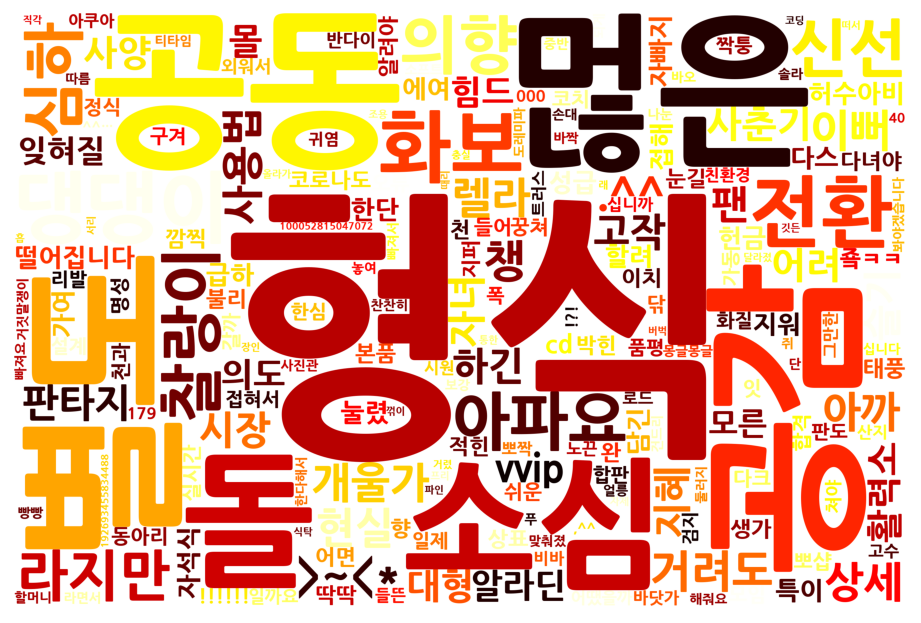

In [ ]:

plt.imshow(wordcloud) 

figure = plt.gcf() # get current figure
figure.set_size_inches(8, 6)
plt.axis('off') 
plt.show()